## Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")##sometimes we get some warnings so to avoid them


## Importing dataset

In [ ]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## AS WE CAN SEE THAT THERE ARE NO MISSING VALUES IN ANY COLUMN

<Axes: xlabel='price', ylabel='count'>

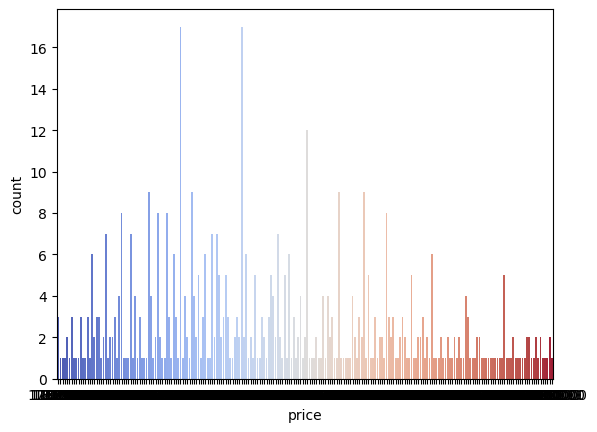

In [8]:
sns.countplot(x="price",data=df,palette="coolwarm")

In [9]:
from pandas.core.arrays import boolean
df['mainroad']=df['mainroad'].astype(bool)
df['guestroom']=df['guestroom'].astype(bool)
df['basement']=df['basement'].astype(bool)
df['hotwaterheating']=df['hotwaterheating'].astype(bool)
df['airconditioning']=df['airconditioning'].astype(bool)
df['parking']=df['parking'].astype(bool)
df['prefarea']=df['prefarea'].astype(bool)
df['furnishingstatus']=df['furnishingstatus'].astype(bool)



In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,True,True,True,True,True,True,True
1,12250000,8960,4,4,4,True,True,True,True,True,True,True,True
2,12250000,9960,3,2,2,True,True,True,True,True,True,True,True
3,12215000,7500,4,2,2,True,True,True,True,True,True,True,True
4,11410000,7420,4,1,2,True,True,True,True,True,True,True,True


<Axes: >

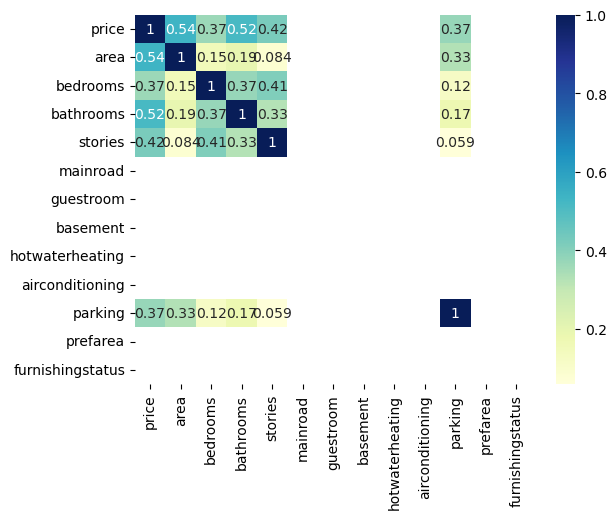

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

## SPLITTING THE DATA SET INTO TRAIN AND TEST

In [12]:
X = df.drop(['price'],axis=1)
y = df['price']

In [13]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,True,True,True,True,True,True,True,True
1,8960,4,4,4,True,True,True,True,True,True,True,True
2,9960,3,2,2,True,True,True,True,True,True,True,True
3,7500,4,2,2,True,True,True,True,True,True,True,True
4,7420,4,1,2,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,True,True,True,True,True,True,True,True
541,2400,3,1,1,True,True,True,True,True,False,True,True
542,3620,2,1,1,True,True,True,True,True,False,True,True
543,2910,3,1,1,True,True,True,True,True,False,True,True


In [14]:
y


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## LENGTH OF TRAIN AND TEST DATA

In [16]:

len(X_train),len(X_test)

(381, 164)

In [17]:
#IMPORTING THE MODEL
from sklearn.linear_model import LinearRegression
model_1= LinearRegression()

In [18]:
# FITTING DATA INTO MODEL
model_1.fit(X_train,y_train)

LinearRegression()

In [19]:
y_predict = model_1.predict(X_test)

In [20]:
## PREDICTING OUTCOMES
y_predict

array([6511200.39876161, 6412363.2476674 , 3283608.86260288,
       4256503.43644671, 3438770.93005257, 4373329.34651873,
       5568155.33259969, 5617735.64117881, 3598053.73172296,
       3012124.69644845, 9532197.85344357, 3247716.40168063,
       3175254.26359231, 3613148.00482145, 3907737.07088144,
       6157345.44693041, 3058428.35352029, 5180442.92500124,
       5129651.70671504, 3947280.78154262, 5194435.71810446,
       4408883.19931908, 3151213.08693684, 4435505.05680357,
       5476731.13968452, 7703698.65650589, 2961931.14679025,
       4761654.7613795 , 7618421.40273907, 3397036.47542832,
       5100262.88328753, 4205251.53390611, 6243059.18671339,
       4803355.55332818, 4362567.32621973, 5888759.12307885,
       4721967.52793777, 3822487.37177642, 3276239.03153671,
       4871781.94861542, 5385306.94676935, 3144779.53262059,
       6385274.59791476, 4570948.30556679, 4201236.87297365,
       4493672.2141697 , 6708639.24632318, 4902186.59640865,
       4641427.43145409,

## EVALUATION

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [22]:
score

0.5333396320974665

In [23]:
mae ## mean absolute error

1046062.674237988

In [26]:
## prediction of price for an example input with all parameters except the price

new_house = [[1000,4,3,2,True,False,True,False,False,2,True,False]]
predicted_price = model_1.predict(new_house)
print(f"predicted price for new house : {predicted_price}")

predicted price for new house : [6619719.53680761]
